loading VQA annotations and questions into memory...
0:00:05.237891
creating index...
index created!
Loading and preparing results...     
DONE (t=0.68s)
creating index...
index created!
computing accuracy
Finshed Percent: [####################] 99% Done computing accuracy


Overall Accuracy is: 6.59

Per Question Type Accuracy is the following:
what is on the : 5.10
why : 5.01
what room is : 5.14
is there a : 6.40
is the person : 7.63
was : 7.77
what are : 5.31
is the : 7.43
what is the : 6.21
is this an : 7.95
does this : 6.99
what is in the : 5.15
is it : 6.71
can you : 5.93
where are the : 4.81
what color are the : 6.44
does the : 6.80
is the woman : 6.35
what is the woman : 5.73
what : 5.51
what is the person : 5.74
do : 7.48
is the man : 6.70
what are the : 5.96
what is this : 5.80
none of the above : 6.62
are the : 8.03
which : 5.85
do you : 7.60
are they : 7.87
what is the man : 6.30
what sport is : 6.68
what color is : 6.98
is he : 7.15
what color : 6.67
what brand : 5.70
how 

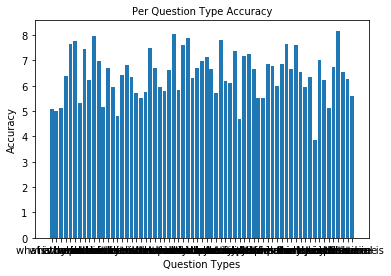

In [9]:
# coding: utf-8

import sys
dataDir = '/Users/yanan/Desktop/VQAEvaluation'
sys.path.insert(0, '%s/PythonHelperTools/vqaTools' %(dataDir))
from vqa import VQA
sys.path.insert(0, '%s/PythonEvaluationTools' %(dataDir))
from vqaEvaluation.vqaEval import VQAEval
import matplotlib.pyplot as plt
import skimage.io as io
import json
import random
import os

# set up file names and paths
versionType ='' # this should be '' when using VQA v2.0 dataset
taskType    ='OpenEnded' # 'OpenEnded' only for v2.0. 'OpenEnded' or 'MultipleChoice' for v1.0
dataType    ='mscoco'  # 'mscoco' only for v1.0. 'mscoco' for real and 'abstract_v002' for abstract for v1.0. 
dataSubType ='train2014'
annFile     ='%s/Annotations/%s%s_%s_annotations.json'%(dataDir, versionType, dataType, dataSubType)
quesFile    ='%s/Questions/%s%s_%s_%s_questions.json'%(dataDir, versionType, taskType, dataType, dataSubType)
#imgDir      ='%s/Images/%s/%s/' %(dataDir, dataType, dataSubType)
resultType  ='fake'
fileTypes   = ['results', 'accuracy', 'evalQA', 'evalQuesType', 'evalAnsType'] 

# An example result json file has been provided in './Results' folder.  

[resFile, accuracyFile, evalQAFile, evalQuesTypeFile, evalAnsTypeFile] = ['%s/Results/%s%s_%s_%s_%s_%s.json'%(dataDir, versionType, taskType, dataType, dataSubType, \
resultType, fileType) for fileType in fileTypes]  

# create vqa object and vqaRes object
vqa = VQA(annFile, quesFile)
vqaRes = vqa.loadRes(resFile, quesFile)

# create vqaEval object by taking vqa and vqaRes
vqaEval = VQAEval(vqa, vqaRes, n=2)   #n is precision of accuracy (number of places after decimal), default is 2

# evaluate results
"""
If you have a list of question ids on which you would like to evaluate your results, pass it as a list to below function
By default it uses all the question ids in annotation file
"""
vqaEval.evaluate() 

# print accuracies
print("\n")
print("Overall Accuracy is: %.02f\n" %(vqaEval.accuracy['overall']))
print("Per Question Type Accuracy is the following:")
for quesType in vqaEval.accuracy['perQuestionType']:
	print("%s : %.02f" %(quesType, vqaEval.accuracy['perQuestionType'][quesType]))
print("\n")
print("Per Answer Type Accuracy is the following:")
for ansType in vqaEval.accuracy['perAnswerType']:
	print("%s : %.02f" %(ansType, vqaEval.accuracy['perAnswerType'][ansType]))
print("\n")
# demo how to use evalQA to retrieve low score result
evals = [quesId for quesId in vqaEval.evalQA if vqaEval.evalQA[quesId]<35]   #35 is per question percentage accuracy
if len(evals) > 0:
	print('ground truth answers')
	randomEval = random.choice(evals)
	randomAnn = vqa.loadQA(randomEval)
	vqa.showQA(randomAnn)

	print('\n')
	print('generated answer (accuracy %.02f)'%(vqaEval.evalQA[randomEval]))
	ann = vqaRes.loadQA(randomEval)[0]
	print("Answer:   %s\n" %(ann['answer']))

	#imgId = randomAnn[0]['image_id']
	#imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
	#if os.path.isfile(imgDir + imgFilename):
		#I = io.imread(imgDir + imgFilename)
		#plt.imshow(I)
		#plt.axis('off')
		#plt.show()

# plot accuracy for various question types
plt.bar(range(len(vqaEval.accuracy['perQuestionType'])), vqaEval.accuracy['perQuestionType'].values(), align='center')
plt.xticks(range(len(vqaEval.accuracy['perQuestionType'])), vqaEval.accuracy['perQuestionType'].keys(), rotation='0',fontsize=10)
plt.title('Per Question Type Accuracy', fontsize=10)
plt.xlabel('Question Types', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.show()

# save evaluation results to ./Results folder
json.dump(vqaEval.accuracy,     open(accuracyFile,     'w'))
json.dump(vqaEval.evalQA,       open(evalQAFile,       'w'))
json.dump(vqaEval.evalQuesType, open(evalQuesTypeFile, 'w'))
json.dump(vqaEval.evalAnsType,  open(evalAnsTypeFile,  'w'))